In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/kaggle_API_credentials'

In [3]:
!kaggle datasets download -d kavithak1388/cityscapes

100% 11.0G/11.0G [01:49<00:00, 114MB/s]
100% 11.0G/11.0G [01:49<00:00, 108MB/s]


In [5]:
!kaggle datasets download -d mei1963/gta5-da

  0% 0.00/57.8G [00:00<?, ?B/s]
User cancelled operation


In [5]:
# ! unzip cityscapes.zip

In [7]:
# ! unzip gta5-da.zip

In [50]:
# #!/usr/bin/env python
# __author__ = "Sreenivas Bhattiprolu"
# __license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# # https://www.youtube.com/watch?v=D9HjlqIrB-c




# """
# @author: Sreenivas Bhattiprolu
# Working great.
# Good example to demo image reconstruction using autoencoders

# To launch tensorboard type this in the console: !tensorboard --logdir=logs/ --host localhost --port 8088
# then go to: http://localhost:8088/

# The ! is because we are executing shell commands from Python console.Try different optimizers and loss

# Try:
# Only 5 epochs, 50 epochs, 500 and 5000
# """

# from matplotlib.pyplot import imshow
# import numpy as np
# import cv2
# from keras.preprocessing.image import img_to_array
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
# from tensorflow.keras.models import Sequential


# np.random.seed(42)

# SIZE=256
# img_data=[]

# img=cv2.imread('/content/Cityscape/leftImg8bit/test/berlin/berlin_000000_000019_leftImg8bit.png', 1)   #Change 1 to 0 for grey images
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
# img=cv2.resize(img,(SIZE, SIZE))
# img_data.append(img_to_array(img))

# # Reshape the image data array
# img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
# # Convert image data to float32
# img_array = img_array.astype('float32') / 255.

# img_data2=[]
# # Prediction Images
# img2 = cv2.imread('/content/Cityscape/leftImg8bit/test/bielefeld/bielefeld_000000_000321_leftImg8bit.png', 1)  # Change 1 to 0 for grayscale
# # Resize the second image
# img2 = cv2.resize(img2, (SIZE, SIZE))
# # Append the second image data to list
# img_data.append(img_to_array(img2))


# img_array2 = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
# img_array2 = img_array.astype('float32') / 255.



# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
# model.add(MaxPooling2D((2, 2), padding='same'))
# model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), padding='same'))
# model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))


# model.add(MaxPooling2D((2, 2), padding='same'))

# model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
# model.summary()



# model.fit(img_array, img_array2,
#         epochs=5000,
#         shuffle=True)


# print("Neural network output")
# pred = model.predict(img_array) #prediction images



# imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")


100%|██████████| 191/191 [00:00<00:00, 284.82it/s]


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_210 (Conv2D)         (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_90 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_211 (Conv2D)         (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_91 (MaxPooli  (None, 64, 64, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_212 (Conv2D)         (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_92 (MaxPooli  (None, 32, 32, 8)       

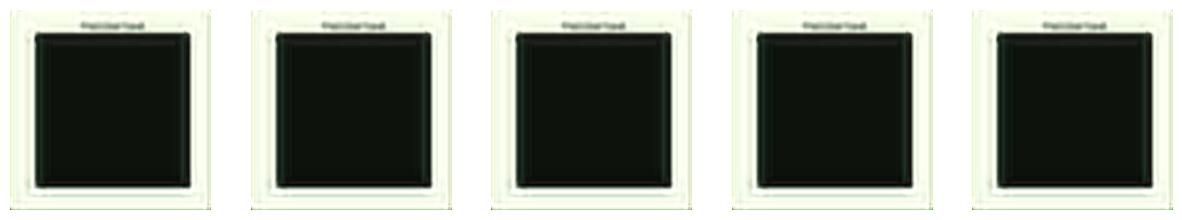

In [93]:
#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"

import numpy as np
import cv2
import os
from tqdm import tqdm
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

SIZE = 256

# Function to load images from a given path
def load_images_from_path(path):
    img_data = []
    files = os.listdir(path)
    for file in tqdm(files):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path, 1)  # Change 0 to 1 for color images
        if img is not None:
            img = cv2.resize(img, (SIZE, SIZE))
            img_data.append(img_to_array(img))
        else:
            print(f"Warning: Unable to load image at {img_path}")
    return np.array(img_data)



# Paths for train, validation, and prediction data
train_path = '/content/Cityscape/leftImg8bit/train/aachen'  # Update with your train data path
val_path = '/content/Cityscape/leftImg8bit/val/frankfurt'  # Update with your validation data path
pred_path = '/content/drive/MyDrive/Colab Notebooks/kaggle_API_credentials/prediction_2_a'  # Update with your prediction data path

# Load images
train_images = load_images_from_path(train_path)
val_images = load_images_from_path(val_path)
pred_images = load_images_from_path(pred_path)

# Normalize the images
train_images = train_images.astype('float32') / 255.
val_images = val_images.astype('float32') / 255.
pred_images = pred_images.astype('float32') / 255.


# X_train, X_val, y_train, y_val = train_test_split(img_array, img_array2, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(train_images, train_images, test_size=0.20, random_state=42)
#Original einstein image for prediction as monalisa


import time
start=time.time()


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))


model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

# Training
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='logs')]
model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=500,
          batch_size=32,
          shuffle=True,
          callbacks=callbacks)

# Saving the model
model.save('/content/drive/MyDrive/Colab Notebooks/kaggle_API_credentials/autoencoder.model')

# Prediction
pred = model.predict(pred_images)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(pred_images, pred_images)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Display first 5 predicted images
# Display first 5 predicted images
# for i in range(5):
#     # Clip the image data to be within the range [0, 1]
#     clipped_image = np.clip(pred[i].reshape(SIZE, SIZE, 3), 0, 1)
#     imshow(clipped_image)
#     plt.show()
# Display first 5 predicted images in a row
plt.figure(figsize=(15, 3))  # Adjust the figure size as needed
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)  # 1 row, 5 columns, i-th subplot
    clipped_image = np.clip(pred[i].reshape(SIZE, SIZE, 3), 0, 1)
    ax.imshow(clipped_image)
    ax.axis('off')  # Disable axis
plt.show()



**Sample Images from Each Dataset**

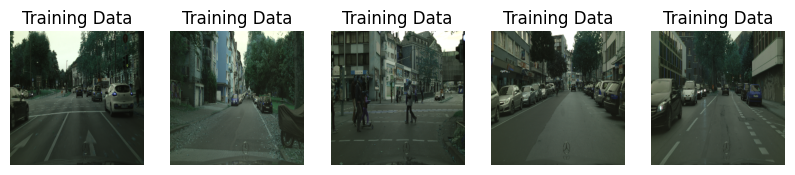

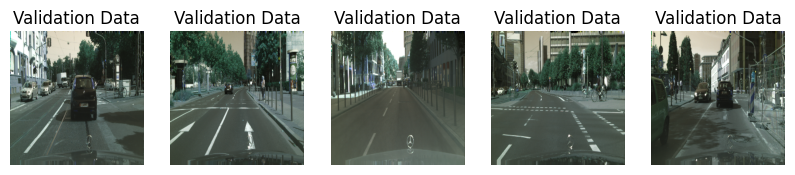

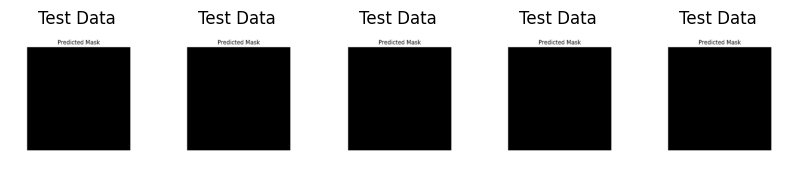

In [94]:
def display_sample_images(images, title):
    plt.figure(figsize=(10, 5))
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].reshape(SIZE, SIZE, 3))
        plt.title(title)
        plt.axis('off')
    plt.show()

display_sample_images(train_images, "Training Data")
display_sample_images(val_images, "Validation Data")
display_sample_images(pred_images, "Test Data")


**Model Loss and Accuracy Over Epochs**

You need to modify your training code to capture the history of training and validation loss and accuracy.

Epoch 1/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0025 - accuracy: 0.9612 - val_loss: 0.0024 - val_accuracy: 0.9665
Epoch 2/500
5/5 [==============================] - 0s 47ms/step - loss: 0.0026 - accuracy: 0.9613 - val_loss: 0.0024 - val_accuracy: 0.9665
Epoch 3/500
5/5 [==============================] - 0s 51ms/step - loss: 0.0026 - accuracy: 0.9612 - val_loss: 0.0024 - val_accuracy: 0.9669
Epoch 4/500
5/5 [==============================] - 0s 50ms/step - loss: 0.0026 - accuracy: 0.9615 - val_loss: 0.0024 - val_accuracy: 0.9665
Epoch 5/500
5/5 [==============================] - 0s 52ms/step - loss: 0.0025 - accuracy: 0.9613 - val_loss: 0.0024 - val_accuracy: 0.9667
Epoch 6/500
5/5 [==============================] - 0s 51ms/step - loss: 0.0025 - accuracy: 0.9614 - val_loss: 0.0024 - val_accuracy: 0.9664
Epoch 7/500
5/5 [==============================] - 0s 47ms/step - loss: 0.0026 - accuracy: 0.9613 - val_loss: 0.0024 - val_accuracy: 0.9667
Epoch 8/500
5/5 [===

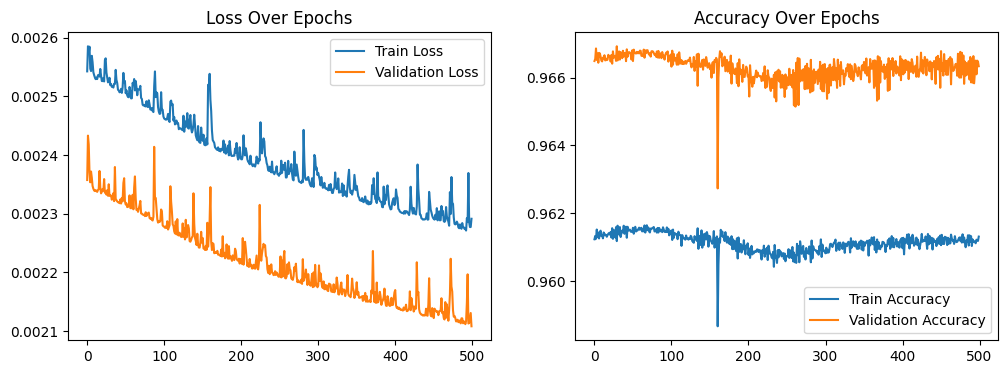

In [95]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=500,
                    batch_size=32,
                    shuffle=True,
                    callbacks=callbacks)
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(pred_images, pred_images)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
# Plotting training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()


**Comparing Original and Reconstructed Images**

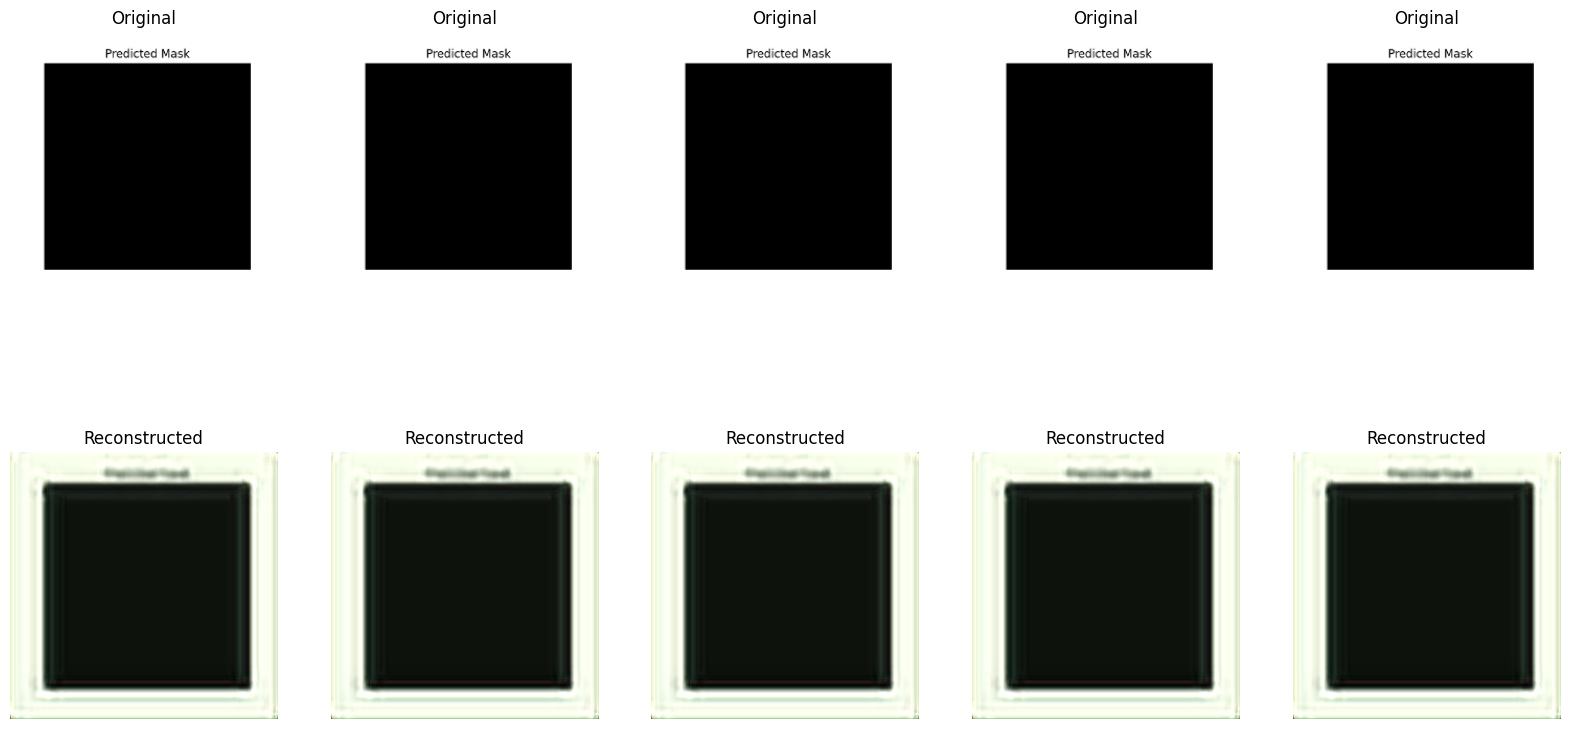

In [96]:
def display_reconstruction(original, reconstructed, n=5):
    plt.figure(figsize=(20, 10))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(SIZE, SIZE, 3))
        plt.title("Original")
        plt.axis('off')

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        reconstructed_image = np.clip(reconstructed[i].reshape(SIZE, SIZE, 3), 0, 1)  # Clipping the values
        plt.imshow(reconstructed_image)
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

display_reconstruction(pred_images, pred)  # Assuming 'pred' is your model's predictions on 'pred_images'
